# Homeostasis à-la-SparseNet on the activation probability

In this notebook, we test the convergence of SparseNet as a function of different learning parameters. This shows the relative robusteness of this method according to the coding parameters, but also the importance of homeostasis to obtain an efficient set of filters.

See also :
* http://blog.invibe.net/posts/2015-05-05-reproducing-olshausens-classical-sparsenet.html for a description of how SparseNet is implemented in the scikit-learn package
* http://blog.invibe.net/posts/2015-05-06-reproducing-olshausens-classical-sparsenet-part-2.html for a descrtiption of how we managed to implement the homeostasis

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2, suppress=True)

In [ ]:
from shl_scripts.shl_experiments import SHL

DEBUG_DOWNSCALE, verbose = 10, 0
DEBUG_DOWNSCALE, verbose = 10, 100
DEBUG_DOWNSCALE, verbose = 1, 10
N_scan = 7
tag = 'HAP'
opts = dict(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, homeo_method=tag, verbose=verbose)
shl = SHL(**opts)
data = shl.get_data(matname='data')
list_figures = ['show_dico', 'plot_variance',  'plot_variance_histogram',  'time_plot_prob',  'time_plot_kurt',  'time_plot_var']

Extracting data..loading the data called : /tmp/data_cache/data_data
Data is of shape : (81920, 576) - done in 0.30s.


## Homeostasis à-la-SparseNet on the activation probability

No cache found /tmp/data_cache/HAP - alpha=0.0002_dico.pkl: Learning the dictionary with algo = mp 
 Training on 81920 patches... Iteration   0 /   4096 (elapsed time:   0s,  0.0mn)
Iteration  410 /   4096 (elapsed time:  26s,  0.0mn)
Iteration  820 /   4096 (elapsed time:  51s,  0.0mn)
Iteration  1230 /   4096 (elapsed time:  72s,  1.0mn)
Iteration  1640 /   4096 (elapsed time:  94s,  1.0mn)
Iteration  2050 /   4096 (elapsed time:  115s,  1.0mn)
Iteration  2460 /   4096 (elapsed time:  132s,  2.0mn)
Iteration  2870 /   4096 (elapsed time:  145s,  2.0mn)
Iteration  3280 /   4096 (elapsed time:  165s,  2.0mn)
Iteration  3690 /   4096 (elapsed time:  185s,  3.0mn)
Learning code... done (total time:  206s,  3.4mn)
done in 207.15s.
No cache found /tmp/data_cache/HAP - alpha=0.0002_coding.npy: Coding with algo = mp 
 Coding data with algorithm  mp done in 13.30s.
loading the code called : /tmp/data_cache/HAP - alpha=0.0002_coding.npy


/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


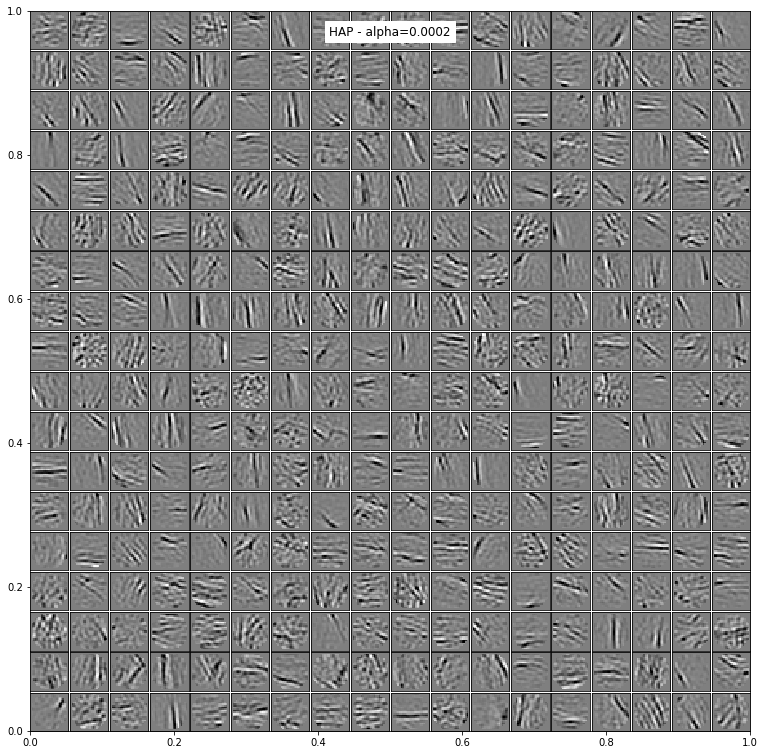

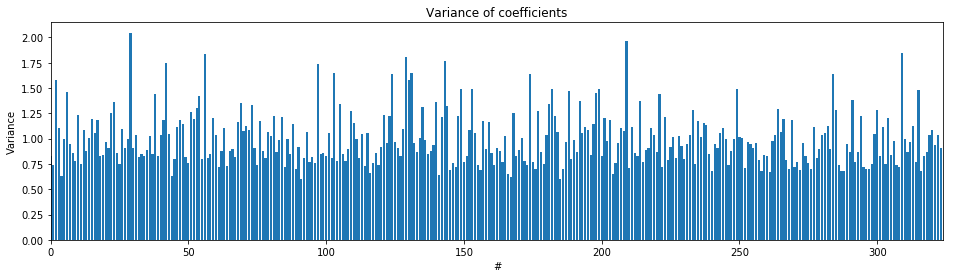

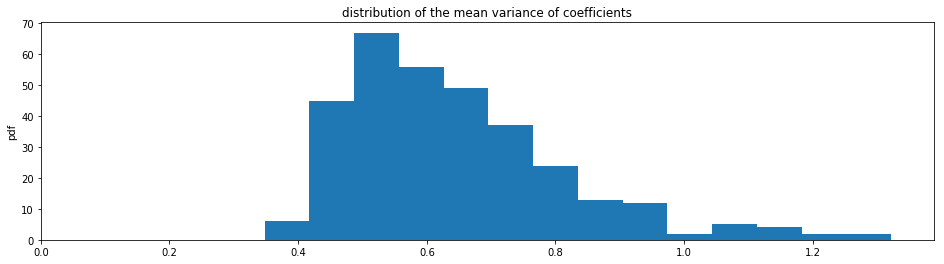

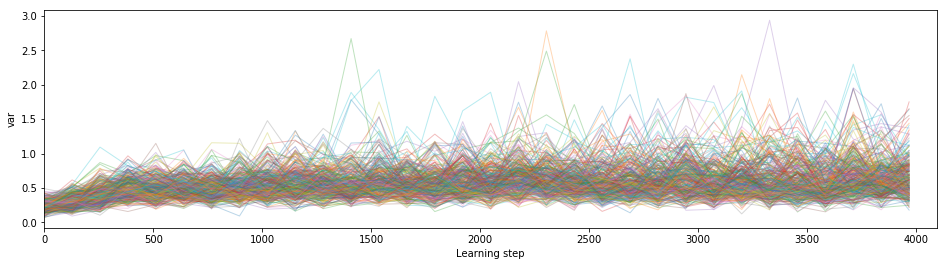

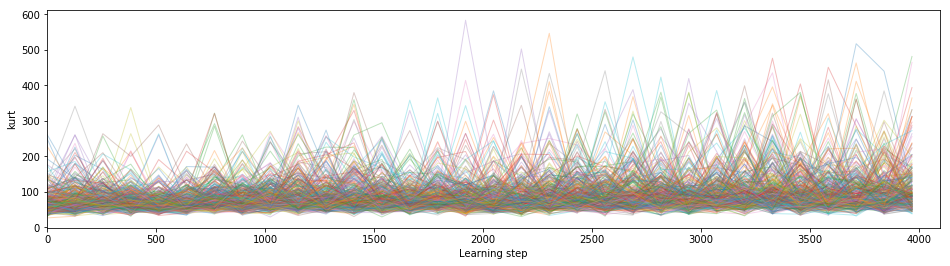

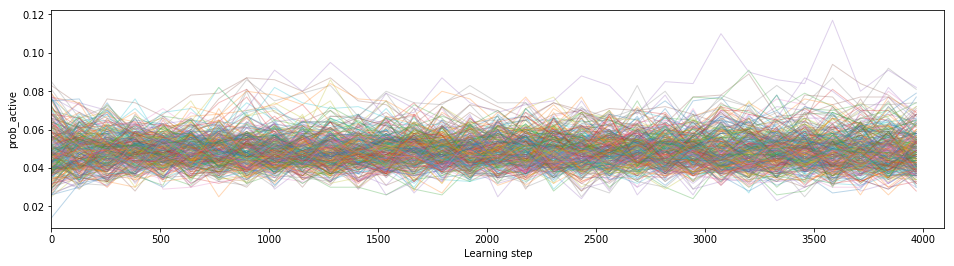

No cache found /tmp/data_cache/HAP - alpha=0.0004308869380063767_dico.pkl: Learning the dictionary with algo = mp 
 Training on 81920 patches... Iteration   0 /   4096 (elapsed time:   0s,  0.0mn)
Iteration  410 /   4096 (elapsed time:  21s,  0.0mn)
Iteration  820 /   4096 (elapsed time:  43s,  0.0mn)
Iteration  1230 /   4096 (elapsed time:  65s,  1.0mn)
Iteration  1640 /   4096 (elapsed time:  86s,  1.0mn)
Iteration  2050 /   4096 (elapsed time:  101s,  1.0mn)
Iteration  2460 /   4096 (elapsed time:  115s,  1.0mn)
Iteration  2870 /   4096 (elapsed time:  136s,  2.0mn)
Iteration  3280 /   4096 (elapsed time:  156s,  2.0mn)
Iteration  3690 /   4096 (elapsed time:  178s,  2.0mn)
Learning code... done (total time:  199s,  3.3mn)
done in 199.18s.
No cache found /tmp/data_cache/HAP - alpha=0.0004308869380063767_coding.npy: Coding with algo = mp 
 Coding data with algorithm  mp 

In [ ]:
eta = SHL(**opts).eta
for alpha in np.logspace(-1, 1, N_scan, base=10)*eta['alpha']:
    shl = SHL(**opts)
    matname = tag + ' - alpha={}'.format(alpha)
    shl.eta.update(alpha=alpha)
    dico = shl.learn_dico(data=data, matname=matname, list_figures=list_figures)    
    plt.show()    

In [ ]:
homeo_params = SHL(**opts).homeo_params
for eta_homeo in np.logspace(-1, 1, N_scan, base=10)*homeo_params['eta_homeo']:
    shl = SHL(**opts)    
    matname = tag + ' - eta_homeo={}'.format(eta_homeo)
    shl.homeo_params.update(eta_homeo=eta_homeo)
    dico = shl.learn_dico(data=data, matname=matname, list_figures=list_figures)    
    plt.show()

In [ ]:
homeo_params = SHL(**opts).homeo_params
for alpha_homeo in np.logspace(-1, 0.4, N_scan, base=10)*homeo_params['alpha_homeo']:
    shl = SHL(**opts)    
    matname = tag + ' - alpha_homeo={}'.format(alpha_homeo)
    shl.homeo_params.update(alpha_homeo=alpha_homeo)
    dico = shl.learn_dico(data=data, matname=matname, list_figures=list_figures)
    plt.show()

## Version used

In [ ]:
%load_ext version_information
%version_information numpy, shl_scripts